# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [ ]:
# insert code here
act = results['actual'].value_counts()
print(act)

1.0    3000
0.0    2000
Name: actual, dtype: int64


Here, there is a little imbalance due to the data's 3:2 ratio, which causes an unbalanced amount of cases in the training dataset for each class label. Not much is out of whack. Model may be biased towards the majority class in this dataset, which is the true class, but the likelihood of bias is quite low because the imbalance is not very severe.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

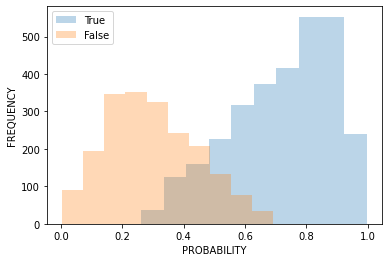

In [ ]:
# insert code here
td = results[results['actual'] == 1.0]
fd = results[results['actual'] == 0.0]
plt.hist(td['prob'], bins=10, alpha=0.3, label='True')
plt.hist(fd['prob'], bins=10, alpha=0.3, label='False')
plt.xlabel('PROBABILITY')
plt.ylabel('FREQUENCY')
plt.legend(loc='upper left')
plt.show()

The histogram illustrates the distribution of predicted probabilities for the True and False classes, plotted separately. The probabilities for the False class are mainly concentrated around 0.2-0.4, with a few instances having probabilities close to 0 or 0.8. For the True class, the probabilities are also mainly concentrated around 0.8, but there are fewer instances with probabilities close to 0.2 .

When we compare the two distributions, we observe that the distribution of probabilities for the True class is slightly shifted to the right compared to the False class. This shift indicates that the classification model is more confident in its predictions for the True class than the False class. However, there is still a significant overlap between the two distributions, indicating that the model is not effectively distinguishing between the True and False classes.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [ ]:
predicted = (results['prob'] >= 0.5).astype(int)
confusion_matrix = pd.crosstab(results['actual'], predicted, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted     0     1
Actual               
0.0        1790   210
1.0         377  2623


Reference:https://stackoverflow.com/questions/59192392/crosstab-and-confusion-matrix-results-disagreement-in-python

The confusion matrix reveals that the classification model accurately predicted 1790 observations as False and 2623 observations as True. However, it misclassified 210 False observations as True, resulting in False Positives, and 377 True observations as False, resulting in False Negatives. Therefore, the model's performance is not perfect and could be further evaluated using additional metrics that are more robust to class imbalance. The model is performing little bit better.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [ ]:

True_P = confusion_matrix.iloc[1,1]
True_N = confusion_matrix.iloc[0,0]
False_P = confusion_matrix.iloc[0,1]
False_N = confusion_matrix.iloc[1,0]
accuracy = (True_P + True_N) / (True_P + True_N + False_P + False_N)
precision = True_P / (True_P + False_P)
recall = True_P / (True_P + False_N)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.8826
Precision: 0.9258736321920226
Recall: 0.8743333333333333


Reference:
https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

precision would be a more appropriate metric than accuracy or recall for evaluating the model's performance.Precision measures the proportion of True predictions that are actually True. In other words, it answers the question: "Of all the instances the model predicted as True, how many were actually True?" This metric is directly related to the number of False Positives, as it captures the proportion of predicted True instances that were correctly classified as True. By minimizing False Positives, we can improve precision and reduce the overall cost of misclassifying False Positives.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

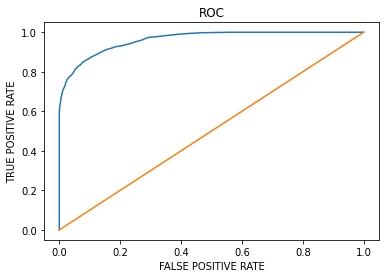

In [ ]:
# Insert code here
thresholds = np.linspace(0, 1, 101)
true_pr = []
false_pr = []
for threshold in thresholds:
    true_p = ((results['prob'] >= threshold) & (results['actual'] == 1.0)).sum()
    false_n = ((results['prob'] < threshold) & (results['actual'] == 1.0)).sum()
    false_p = ((results['prob'] >= threshold) & (results['actual'] == 0.0)).sum()
    true_n = ((results['prob'] < threshold) & (results['actual'] == 0.0)).sum()
    true_pr.append(true_p / (true_p + false_n))
    false_pr.append(false_p / (false_p + true_n))
plt.plot(false_pr, true_pr)
plt.plot([0, 1], [0, 1], linestyle='-')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC')
plt.show()

References:
https://www.geeksforgeeks.org/numpy-linspace-python/

As we know that Classifiers that give curves closer to the top-left corner imply a better performance, it is obvious that this fit of the model has the best performance. The model is more accurate the closer the curve is to the upper left. Depending on whether we want to raise tpr while lowering fpr or raising both, we can choose the ideal threshold from this plot. To pick the best threshold, tpr and fpr must be carefully balanced.